# IMDB Movie Analysis

1. Importing libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Importing the CSV file to a dataframe

In [20]:
df = pd.read_csv('IMDB_Movies.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


3. Cleaning the data

* Determining null values in the dataframe

In [21]:
df.isnull().sum().sort_values(ascending=False)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
language                      14
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

* Removing null values

In [22]:
df.dropna(inplace=True)

* Checking for duplicate values
* If there is any then removing it

In [23]:
df.duplicated().sum()

33

> 33 duplicate rows to be removed

In [24]:
df.drop_duplicates(inplace=True)

* Determinig the irrelevant columns and removing them

In [25]:
df.keys()

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [26]:
df=df.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes',
            'actor_3_facebook_likes','cast_total_facebook_likes',
            'duration','facenumber_in_poster','content_rating','country','movie_imdb_link',
            'aspect_ratio','plot_keywords'],axis=1)

In [27]:
df.keys()

Index(['director_name', 'num_critic_for_reviews', 'actor_2_name', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

* Analysis:
    * Movies with highest profit
    * Top 250 movies
    * Best Directors
    * Popular Genres
    * Charts

4. Movies with highest profit
    * creating a new column "profit"
    * profit = gross - budget

In [28]:
df['profit']=df['gross']-df['budget']

In [29]:
top10=df.sort_values(by='profit',ascending=False).head(10)
top10

,director_name,num_critic_for_reviews,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
29,Colin Trevorrow,644.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,1290,English,150000000.0,2015.0,7.0,150000,502177271.0
26,James Cameron,315.0,Kate Winslet,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,Gloria Stuart,2528,English,200000000.0,1997.0,7.7,26000,458672302.0
3024,George Lucas,282.0,Peter Cushing,460935665.0,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,Kenny Baker,1470,English,11000000.0,1977.0,8.7,33000,449935665.0
3080,Steven Spielberg,215.0,Dee Wallace,434949459.0,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,Peter Coyote,515,English,10500000.0,1982.0,7.9,34000,424449459.0
17,Joss Whedon,703.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,1722,English,220000000.0,2012.0,8.1,123000,403279547.0
509,Roger Allers,186.0,Nathan Lane,422783777.0,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,Niketa Calame,656,English,45000000.0,1994.0,8.5,17000,377783777.0
240,George Lucas,320.0,Liam Neeson,474544677.0,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,Ian McDiarmid,3597,English,115000000.0,1999.0,6.5,13000,359544677.0
66,Christopher Nolan,645.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,4667,English,185000000.0,2008.0,9.0,37000,348316061.0
439,Gary Ross,673.0,Josh Hutcherson,407999255.0,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,Anthony Reynolds,1959,English,78000000.0,2012.0,7.3,140000,329999255.0


In [30]:
top10.to_csv("Top 10 movies with highest profit.csv")

* * finding the outliers

In [31]:
df['profit'].sort_values().head(5)

2988   -1.221330e+10
3859   -4.199788e+09
3005   -2.499804e+09
2323   -2.397702e+09
2334   -2.127110e+09
Name: profit, dtype: float64

* * Box Plot

<Axes: >

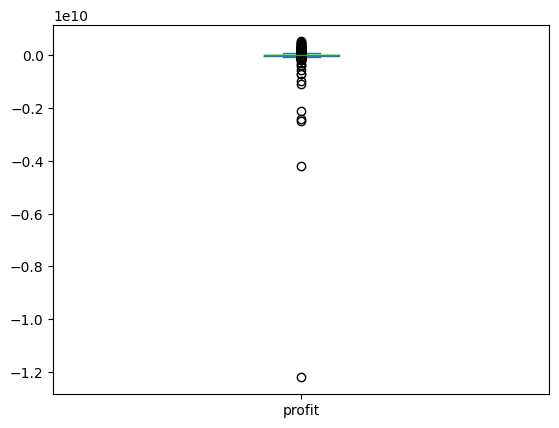

In [32]:
df['profit'].plot(kind='box')

* * Scatter plot

<Axes: xlabel='gross', ylabel='profit'>

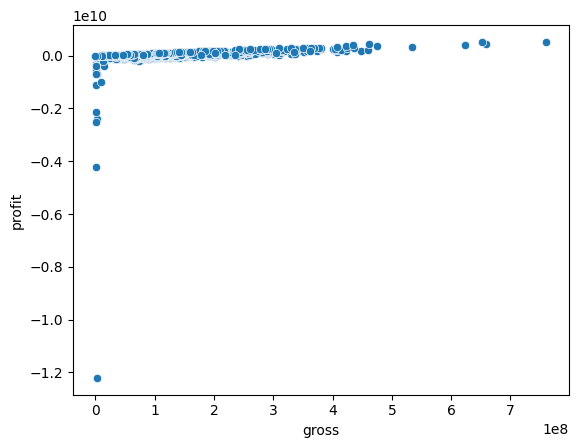

In [33]:
sns.scatterplot(x=df['gross'], y=df['profit'])

* Outliers:
    * -12213298588
    * -4199788333
    * -2499804112
    * -2127109510

5. Top 250 Movies
    * Creating a new dataframe IMDB_Top_250 to show the top 250 movies with the highest IMDb Ratings.
    * Sorting it in Descending order
    * Showing top 250 movies which are in English
    * Showing top 250 movies which are not in English

* Creating IMDB_Top_250 dataframe

In [38]:
IMDB_Top_250= df[df['num_voted_users']>25000].sort_values(by='imdb_score',ascending=False).head(250)
IMDB_Top_250

,director_name,num_critic_for_reviews,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1937,Frank Darabont,199.0,Jeffrey DeMunn,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,Bob Gunton,4144,English,25000000.0,1994.0,9.3,108000,3341469.0
3466,Francis Ford Coppola,208.0,Marlon Brando,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,Robert Duvall,2238,English,6000000.0,1972.0,9.2,43000,128821952.0
66,Christopher Nolan,645.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,4667,English,185000000.0,2008.0,9.0,37000,348316061.0
2837,Francis Ford Coppola,149.0,Al Pacino,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,Robert Duvall,650,English,13000000.0,1974.0,9.0,14000,44300000.0
3355,Quentin Tarantino,215.0,Eric Stoltz,107930000.0,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,Phil LaMarr,2195,English,8000000.0,1994.0,8.9,45000,99930000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,Pierre Morel,309.0,Holly Valance,145000989.0,Action|Thriller,Liam Neeson,Taken,483756,Xander Berkeley,974,English,25000000.0,2008.0,7.9,29000,120000989.0
3595,Darren Aronofsky,391.0,John D'Leo,26236603.0,Drama|Sport,Mark Margolis,The Wrestler,251349,Ajay Naidu,547,English,6000000.0,2008.0,7.9,10000,20236603.0
0,James Cameron,723.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054,English,237000000.0,2009.0,7.9,33000,523505847.0
89,Don Hall,384.0,Daniel Henney,222487711.0,Action|Adventure|Animation|Comedy|Drama|Family...,Damon Wayans Jr.,Big Hero 6,279093,Abraham Benrubi,433,English,165000000.0,2014.0,7.9,41000,57487711.0


* Exporting as CSV file

In [39]:
IMDB_Top_250.to_csv("Top 10 movies with highest profit.csv")

* Showing top 250 movies (English)

In [40]:
IMDB_Top_250[IMDB_Top_250['language']=='English'].sort_values(by='imdb_score',ascending=False).head(250)

,director_name,num_critic_for_reviews,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1937,Frank Darabont,199.0,Jeffrey DeMunn,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,Bob Gunton,4144,English,25000000.0,1994.0,9.3,108000,3341469.0
3466,Francis Ford Coppola,208.0,Marlon Brando,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,Robert Duvall,2238,English,6000000.0,1972.0,9.2,43000,128821952.0
66,Christopher Nolan,645.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,4667,English,185000000.0,2008.0,9.0,37000,348316061.0
2837,Francis Ford Coppola,149.0,Al Pacino,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,Robert Duvall,650,English,13000000.0,1974.0,9.0,14000,44300000.0
3355,Quentin Tarantino,215.0,Eric Stoltz,107930000.0,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,Phil LaMarr,2195,English,8000000.0,1994.0,8.9,45000,99930000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,Doug Liman,249.0,Josh Hamilton,121468960.0,Action|Mystery|Thriller,Matt Damon,The Bourne Identity,407601,Nicky Naudé,849,English,60000000.0,2002.0,7.9,0,61468960.0
1884,Brian De Palma,123.0,Billy Drago,76270454.0,Crime|Drama|Thriller,Robert De Niro,The Untouchables,219008,Charles Martin Smith,418,English,25000000.0,1987.0,7.9,0,51270454.0
3680,Spike Lee,103.0,John Savage,27545445.0,Drama,Ruby Dee,Do the Right Thing,59524,Danny Aiello,418,English,6500000.0,1989.0,7.9,0,21045445.0
3361,Jonathan Dayton,270.0,Steven Christopher Parker,59889948.0,Comedy|Drama,Steve Carell,Little Miss Sunshine,355810,Jill Talley,889,English,8000000.0,2006.0,7.9,15000,51889948.0


* Showing top 250 movies (non-english)

In [41]:
IMDB_Top_250[IMDB_Top_250['language']!='English'].sort_values(by='imdb_score',ascending=False).head(250)

,director_name,num_critic_for_reviews,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
4498,Sergio Leone,181.0,Luigi Pistilli,6100000.0,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,Enzo Petito,780,Italian,1.200000e+06,1966.0,8.9,20000,4.900000e+06
4747,Akira Kurosawa,153.0,Minoru Chiaki,269061.0,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,Kamatari Fujiwara,596,Japanese,2.000000e+06,1954.0,8.7,11000,-1.730939e+06
4029,Fernando Meirelles,214.0,Seu Jorge,7563397.0,Crime|Drama,Alice Braga,City of God,533200,Alexandre Rodrigues,749,Portuguese,3.300000e+06,2002.0,8.7,28000,4.263397e+06
2373,Hayao Miyazaki,246.0,Ryûnosuke Kamiki,10049886.0,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,Miyu Irino,902,Japanese,1.900000e+07,2001.0,8.6,28000,-8.950114e+06
4921,Majid Majidi,46.0,Amir Farrokh Hashemian,925402.0,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,Mohammad Amir Naji,130,Persian,1.800000e+05,1997.0,8.5,0,7.454020e+05
4259,Florian Henckel von Donnersmarck,215.0,Ulrich Mühe,11284657.0,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,Martina Gedeck,407,German,2.000000e+06,2006.0,8.5,39000,9.284657e+06
2323,Hayao Miyazaki,174.0,Jada Pinkett Smith,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,Billy Crudup,570,Japanese,2.400000e+09,1997.0,8.4,11000,-2.397702e+09
4659,Asghar Farhadi,354.0,Leila Hatami,7098492.0,Drama|Mystery,Shahab Hosseini,A Separation,151812,Peyman Moaadi,264,Persian,5.000000e+05,2011.0,8.4,48000,6.598492e+06
4105,Chan-wook Park,305.0,Ji-tae Yu,2181290.0,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,Hye-jeong Kang,809,Korean,3.000000e+06,2003.0,8.4,43000,-8.187100e+05
1298,Jean-Pierre Jeunet,242.0,Jamel Debbouze,33201661.0,Comedy|Romance,Mathieu Kassovitz,Amélie,534262,Isabelle Nanty,1314,French,7.700000e+07,2001.0,8.4,39000,-4.379834e+07
